# KENYA PERCH CXR WND-CHARM Scanning Window ANALYSIS

November 2015

1. Get the intercostals
2. Get a bounding box based on expanded selection
3. Create collage of bounding box with diagnosis jpegs
3. Train 60x60 windows, overlapping by 15 px
4. Create masks from jpgs

# Software versions used here

In [1]:
import pandas as pd; print pd.__version__

0.17.0


In [2]:
import numpy as np; print np.__version__

1.10.1


In [3]:
import wndcharm; print wndcharm.__version__

0.9.12


# Identify classification area from intercostal locations

Create bounding box within which to calculate wndcharm features

In [4]:
pwd

u'/Users/colettace/projects/PERCH_Kenya/All_CXR'

In [5]:
cd training_set/

/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set


In [6]:
ls *.csv

Human_locating_abnormal_TRAINING_SET.csv  ic_coords.csv                             master_KENYA_strip_data.csv               strip_sizes.csv


In [7]:
diagnoses = pd.DataFrame.from_csv( 'Human_locating_abnormal_TRAINING_SET.csv')

In [8]:
diagnoses.index = diagnoses['Subject ID']

In [9]:
diagnoses.head()

,Subject ID,CXR_ID,Draw_in_Folder,Final_conslusion,Note,Tile_1,Tile_2,Tile_3,Tile_4,Tile_5,...,Tile_13,Tile_14,Tile_15,Tile_16,Tile_17,Tile_18,Tile_19,Tile_20,Tile_21,Tile_22
Subject ID,,,,,,,,,,,,,,,,,,,,,
K00002,K00002,NaN,undrawn,4 - Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00032,K00032,NaN,undrawn,4 - Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00055,K00055,K00055-AP,3,2 - Other infiltrate only,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00069,K00069,NaN,undrawn,4 - Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00086,K00086,K00086-AP,1,1 - PEP only,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
diagnoses = diagnoses[ [ 'Draw_in_Folder', 'Final_conslusion']]

In [11]:
diagnoses.head()

,Draw_in_Folder,Final_conslusion
Subject ID,,
K00002,undrawn,4 - Normal
K00032,undrawn,4 - Normal
K00055,3,2 - Other infiltrate only
K00069,undrawn,4 - Normal
K00086,1,1 - PEP only


In [12]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '4 - Normal'] = 'CLEAR'

In [13]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '2 - Other infiltrate only'] = 'OI'

In [14]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '1 - PEP only'] = 'PEP'

In [15]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '3 - Both PEP and other infiltrate'] = 'PEP+OI'

In [16]:
diagnoses['Final_conslusion'].value_counts()

CLEAR     209
OI        115
PEP        42
PEP+OI     37
Name: Final_conslusion, dtype: int64

In [17]:
diagnoses.head()

,Draw_in_Folder,Final_conslusion
Subject ID,,
K00002,undrawn,CLEAR
K00032,undrawn,CLEAR
K00055,3,OI
K00069,undrawn,CLEAR
K00086,1,PEP


In [18]:
len(diagnoses)

403

In [19]:
ic_locs = pd.DataFrame.from_csv( 'ic_coords.csv' )

In [20]:
len(ic_locs)

403

In [21]:
ic_locs.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Subject ID
K03144,"(714, 516)","(676, 546)","(652, 592)","(638, 642)","(628, 692)","(622, 742)","(612, 792)","(596, 848)","(590, 924)","(600, 996)",...,"(998, 638)","(1004, 680)","(1012, 724)","(1018, 770)","(1018, 816)","(1016, 870)","(1028, 938)","(1024, 1008)","(1000, 1080)",K03144
K01365,"(780, 314)","(770, 336)","(750, 380)","(738, 426)","(722, 466)","(714, 504)","(712, 544)","(708, 594)","(700, 644)","(684, 712)",...,"(1102, 388)","(1126, 432)","(1142, 478)","(1156, 526)","(1174, 586)","(1176, 646)","(1194, 730)","(1192, 830)","(1180, 930)",K01365
K01366,"(704, 525)","(656, 577)","(640, 639)","(632, 695)","(630, 747)","(620, 807)","(612, 873)","(596, 943)","(568, 1043)","(564, 1163)",...,"(1084, 621)","(1102, 681)","(1120, 735)","(1142, 799)","(1162, 873)","(1182, 957)","(1194, 1063)","(1192, 1169)","(1176, 1275)",K01366
K02316,"(790, 304)","(754, 346)","(730, 392)","(708, 444)","(690, 500)","(684, 560)","(676, 618)","(658, 684)","(640, 766)","(640, 858)",...,"(1042, 404)","(1050, 452)","(1062, 508)","(1072, 578)","(1084, 630)","(1098, 698)","(1106, 782)","(1106, 876)","(1088, 972)",K02316
K05968,"(610, 410)","(564, 474)","(544, 556)","(542, 636)","(538, 712)","(530, 794)","(532, 880)","(528, 984)","(538, 1096)","(564, 1216)",...,"(1012, 550)","(1036, 620)","(1060, 694)","(1076, 768)","(1098, 852)","(1126, 948)","(1144, 1064)","(1152, 1178)","(1166, 1296)",K05968


# Normalize pixel intensity ranges

VERY WEIRD: some tiffs are 10bit pixel intensity range (1023) and some are 12bit (4095)!

In [268]:
clear_prefix = '/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/'

In [269]:
from skimage.io import imread, imsave

In [ ]:
for subjid in ic_locs.index:
    im = imread( clear_prefix + subjid + '-CXR.tif', as_grey=True )

    # TIFFs come in as 12-bit ints, but Jpegs come in as 0.0-1.0 floats
    im = im.astype( np.uint16 )
    print subjid, im.max()
    if im.max() > 1024:
        im /= 4
    imsave( clear_prefix + subjid + '.tif', im)
        

## Shrink down to middle 7 intercostals

In [22]:
ic_locs = ic_locs.drop( '0', 1 ).drop( '1', 1 ).drop('9', 1).drop('10', 1).drop('11', 1).drop('12', 1).drop('20',1).drop('21',1).drop('Subject ID',1)

In [23]:
ic_locs.head()

,2,3,4,5,6,7,8,13,14,15,16,17,18,19
K03144,"(652, 592)","(638, 642)","(628, 692)","(622, 742)","(612, 792)","(596, 848)","(590, 924)","(998, 638)","(1004, 680)","(1012, 724)","(1018, 770)","(1018, 816)","(1016, 870)","(1028, 938)"
K01365,"(750, 380)","(738, 426)","(722, 466)","(714, 504)","(712, 544)","(708, 594)","(700, 644)","(1102, 388)","(1126, 432)","(1142, 478)","(1156, 526)","(1174, 586)","(1176, 646)","(1194, 730)"
K01366,"(640, 639)","(632, 695)","(630, 747)","(620, 807)","(612, 873)","(596, 943)","(568, 1043)","(1084, 621)","(1102, 681)","(1120, 735)","(1142, 799)","(1162, 873)","(1182, 957)","(1194, 1063)"
K02316,"(730, 392)","(708, 444)","(690, 500)","(684, 560)","(676, 618)","(658, 684)","(640, 766)","(1042, 404)","(1050, 452)","(1062, 508)","(1072, 578)","(1084, 630)","(1098, 698)","(1106, 782)"
K05968,"(544, 556)","(542, 636)","(538, 712)","(530, 794)","(532, 880)","(528, 984)","(538, 1096)","(1012, 550)","(1036, 620)","(1060, 694)","(1076, 768)","(1098, 852)","(1126, 948)","(1144, 1064)"


## bounding box is (minx,miny), (maxx,maxy) for all intercostal points

In [24]:
bbs = pd.DataFrame( index=ic_locs.index, columns=['minx','miny','maxx','maxy','w','h','class','img', 'maskimg'])
for i in ic_locs.index:
    row = ic_locs.ix[i]
    s = '(' + ", ".join(row) + ')'
    X, Y = zip(*eval(s) )
    minx, miny, maxx, maxy = (min(X),min(Y),max(X),max(Y))
    bbs.ix[i] = ( minx, miny, maxx, maxy, maxx-minx, maxy-miny, None, None, None )

In [27]:
bbs['class'] = diagnoses['Final_conslusion']

In [28]:
bbs.head()

,minx,miny,maxx,maxy,w,h,class,img,maskimg
K03144,590,592,1028,938,438,346,CLEAR,None,None
K01365,700,380,1194,730,494,350,CLEAR,None,None
K01366,568,621,1194,1063,626,442,CLEAR,None,None
K02316,640,392,1106,782,466,390,CLEAR,None,None
K05968,528,550,1144,1096,616,546,OI,None,None


In [31]:
len(bbs) == len(diagnoses) == len( ic_locs)

True

# Pull in mask paths

In [32]:
pwd

u'/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set'

In [33]:
cd ../../Human_locating_abnormal/

/Users/colettace/projects/PERCH_Kenya/Human_locating_abnormal


In [34]:
ls

Backup/                               Folder2_Both_PEP&OI_different_color/  Folder4_onlyOImarked_reader2/
Folder1_onlyPEPmarked/                Folder3_onlyOImarked_reader1/         Human_locating_abnormal_results.xlsx


In [35]:
all_masks = !find . -iname *.jpg

In [36]:
all_masks[:10]

['./Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00099-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00103-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00116-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00300-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00983-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00984-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01097-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01128-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01348-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01548-AP.jpg']

In [37]:
import re

In [38]:
p = re.compile( r'(K\d\d\d\d\d)' )

In [39]:
from collections import defaultdict

In [40]:
mask_files = defaultdict(list)
for _ in all_masks:
    subjid = p.search(_).group()
    if subjid in bbs.index:
        mask_files[ subjid ].append( _ )

In [41]:
len( mask_files)

194

In [44]:
diff = set( mask_files.keys()) ^ set( bbs.index)

In [45]:
len(diff)

209

In [48]:
len(diff) + len(mask_files) == len( bbs)

True

The set of subjects for which there are masks is a subset of the training set.

In [49]:
dual = []
for subjid, _list in mask_files.items():
    __list = [ m for m in _list if m.startswith('./Folder') ]
    if len( __list ) > 1:
        final_conclusion = diagnoses['Final_conslusion'][subjid]
        print subjid, final_conclusion
        for _ in __list :
            print '\t', _
        dual.append( subjid )
        #bbs['maskimg'][subjid] = _path
    else:
        _path = __list[0]
        bbs['maskimg'][subjid] = _path

K05596 OI
	./Folder1_onlyPEPmarked/K05596-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K05596-AP.jpg
K02507 PEP+OI
	./Folder1_onlyPEPmarked/K02507-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K02507-AP.jpg
K01215 PEP+OI
	./Folder1_onlyPEPmarked/K01215-AP_done.JPG
	./Folder3_onlyOImarked_reader1/K01215-AP.jpg
K05237 PEP+OI
	./Folder2_Both_PEP&OI_different_color/K05237-AP_done.jpg
	./Folder4_onlyOImarked_reader2/K05237-AP.jpg
K04818 PEP+OI
	./Folder1_onlyPEPmarked/K04818-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K04818-AP.jpg
K00142 PEP
	./Folder1_onlyPEPmarked/K00142-AP_done.JPG
	./Folder3_onlyOImarked_reader1/K00142-AP.jpg
K03878 PEP
	./Folder1_onlyPEPmarked/K03878-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K03878-AP.jpg
K01488 PEP+OI
	./Folder1_onlyPEPmarked/K01488-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K01488-AP.jpg


In [50]:
bbs['class'][ dual]

K05596        OI
K02507    PEP+OI
K01215    PEP+OI
K05237    PEP+OI
K04818    PEP+OI
K00142       PEP
K03878       PEP
K01488    PEP+OI
Name: class, dtype: object

In [51]:
bbs['maskimg']['K05596'] = './Folder4_onlyOImarked_reader2/K05596-AP.jpg'

In [52]:
bbs['maskimg']['K05237'] = './Folder2_Both_PEP&OI_different_color/K05237-AP_done.jpg'

In [53]:
bbs['maskimg']['K00142'] = './Folder1_onlyPEPmarked/K00142-AP_done.JPG'

In [54]:
bbs['maskimg']['K03878'] = './Folder1_onlyPEPmarked/K03878-AP_done.JPG'

In [55]:
bbs['class'].value_counts()

CLEAR     209
OI        115
PEP        42
PEP+OI     37
Name: class, dtype: int64

4 subjects have final conclusions of PEP+OI that don't match masks, set those aside for now

In [72]:
i = [ _ != 'CLEAR' for _ in bbs['class'] ]

In [73]:
j = [ _ == None for _ in bbs['maskimg'] ]

In [77]:
drop_these = np.array(i, dtype=bool) & np.array( j, dtype=bool )

In [83]:
drop_indices = np.array( np.nonzero( drop_these) ).flatten()

In [84]:
drop_indices

array([146, 243, 310, 370])

In [76]:
len(bbs)

403

In [86]:
bbs.drop( bbs.index[drop_indices], inplace=True )

In [87]:
len(bbs)

399

In [88]:
bbs['class'].value_counts()

CLEAR     209
OI        115
PEP        42
PEP+OI     33
Name: class, dtype: int64

# Pull in Tiff paths

Use Pandas' melt() function to turn intercostal location columns into rows

In [89]:
pwd

u'/Users/colettace/projects/PERCH_Kenya/Human_locating_abnormal'

In [90]:
cd ../All_CXR/

/Users/colettace/projects/PERCH_Kenya/All_CXR


In [91]:
cd training_set/

/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set


In [95]:
bbs.head()

,minx,miny,maxx,maxy,w,h,class,img,maskimg
K03144,590,592,1028,938,438,346,CLEAR,None,None
K01365,700,380,1194,730,494,350,CLEAR,None,None
K01366,568,621,1194,1063,626,442,CLEAR,None,None
K02316,640,392,1106,782,466,390,CLEAR,None,None
K05968,528,550,1144,1096,616,546,OI,None,./Folder4_onlyOImarked_reader2/K05968-AP.jpg


In [96]:
mask_prefix = '/Users/colettace/projects/PERCH_Kenya/Human_locating_abnormal/'

In [164]:
clear_prefix = '/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/'

# Make collage

In [120]:
n_subjects_across = 20
subject_resolution = 50
collage_width_px = subject_resolution * n_subjects_across
n_subjects_down = int( round( 0.5 + len(bbs) / n_subjects_across ) )
collage_height_px = n_subjects_down * subject_resolution
print n_subjects_across, , n_subjects_down, 

20 1000 20 1000


In [121]:
c = np.zeros(( collage_width_px, collage_height_px))

In [105]:
import matplotlib.pyplot as plt

In [106]:
from PIL import Image

In [108]:
order = { 'PEP': 0, 'PEP+OI': 1, 'OI':2, 'CLEAR':3}

In [112]:
bbs.sort_index(inplace=True)

In [109]:
bbs['sort'] = [ order[ _class ] for _class in bbs['class']]

In [114]:
# mergesort is "stable" meaning won't screw up the preexisting order
bbs.sort_values( 'sort', inplace=True, kind='mergesort' )

In [116]:
%matplotlib inline

In [166]:
im = Image.open( clear_prefix + 'K02918-CXR.tif')

In [179]:
im.mode

'I'

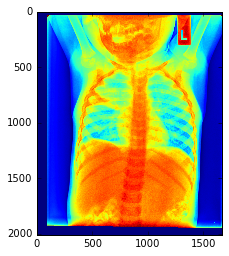

In [235]:
plt.imshow( im)

In [182]:
im16bit = np.asarray(im, dtype=np.uint16)

In [183]:
im16bit.max()

1023

In [255]:
2 ** 12

4096

In [190]:
im8bit = np.asarray(im, dtype=np.uint8)

In [191]:
im8bit.max()

255

In [265]:
from skimage.transform import resize
from skimage.util import crop
from skimage.io import imread
from skimage.io import imsave

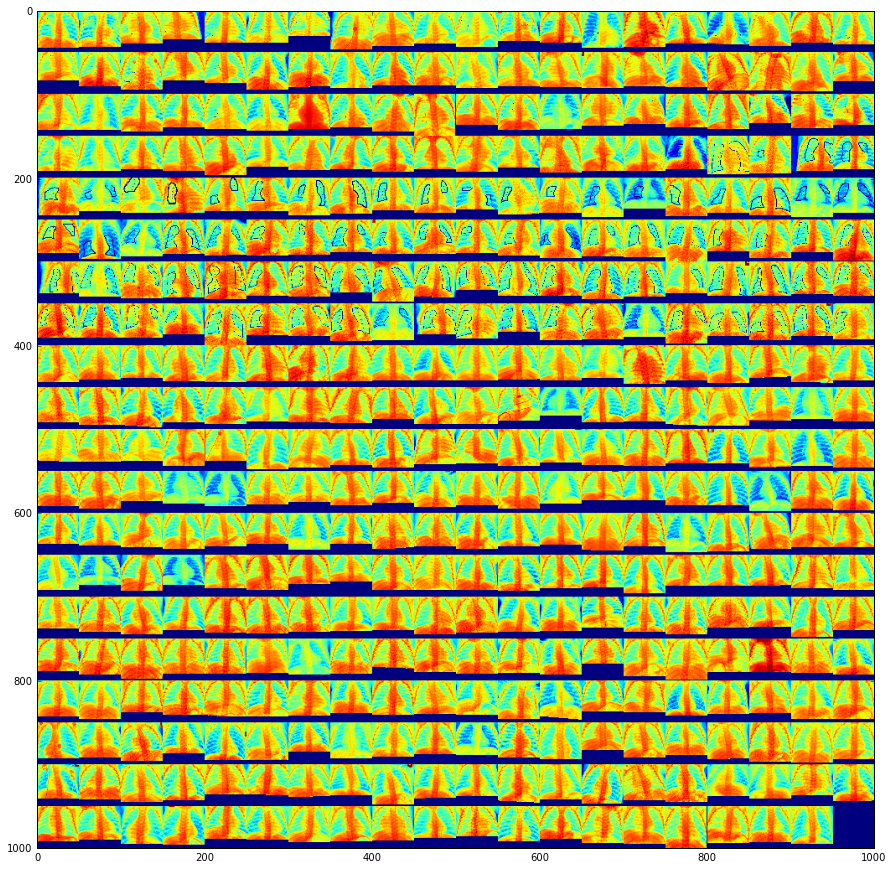

In [275]:
#stats = pd.DataFrame( index=bbs.index, columns=['imgw','imgh','img_max_px','img_min_px','img_stdev_px','crop_max_px','crop_min_px','crop_stdev_px', ])
c = np.zeros(( collage_width_px, collage_height_px))
row = 0
col = 0
extra_buffer = 0.25
for subjid in bbs.index:
    flag = False
    l, u, r, b, ROIw, ROIh, _class, impath, mpath, sort = bbs.ix[ subjid ]
    horiz_padding = int( round( extra_buffer * ROIw ) )
    vert_padding = int( round( extra_buffer * ROIh ) )
    ROIw += 2* horiz_padding
    ROIh += 2* vert_padding

    im = imread( clear_prefix + subjid + '.tif', as_grey=True )
    # TIFFs come in as ints with 10bit range, but Jpegs come in as 0.0-1.0 floats
    im = im.astype( np.float64 ) / 1024
    
    im_h, im_w = im.shape

    if l - horiz_padding < 0:
        print "left", l, horiz_padding
        break
    if r + horiz_padding > im_w:
        print "right", r, horiz_padding
        break
    if u - vert_padding < 0:
        print "upper", u, vert_padding
        break
    if b + horiz_padding > im_h:
        print "bottom", b, vert_padding
        break
        
    if _class != 'CLEAR':
        mask_im = imread( mask_prefix + mpath, as_grey=True )
        if im.shape != mask_im.shape:
            #print "\tIM:", im.shape, "MASK:", mask_im.shape
            mask_im = im
    else:
        mask_im = im

    #print subjid, _class, im.max(), (ROIw, ROIh)
    # crop_width: Number of values to remove from the edges of each axis.
    # axis 0: rows, axis 1: columns ROI = (upper, lower), (left, right)

    ROI = ( u - vert_padding, im_h - b - vert_padding ), ( l - horiz_padding, im_w - r - horiz_padding )
    chest = crop( mask_im, ROI )

    #plt.imshow( chest, interpolation=None )
    maxdim = max( ROIw, ROIh, )
    ratio = float(maxdim) / subject_resolution
    # axis 0: rows/height/vertical, axis1: cols/width/horizontal
    new_size = int( round( float(ROIh) / ratio )), int( round( float( ROIw ) / ratio ) )
    #print subjid, _class, ROI, 'T:', new_size, 'r:{} c:{}'.format( row, col )
    chest = resize( chest, new_size )
    thumbh, thumbw = chest.shape
    #if flag:
        #plt.imshow( chest )#, interpolation=None )
    #    plt.imshow( im )#, interpolation=None )
    #    break
    x1 = col * subject_resolution
    x2 = x1 + thumbw
    y1 = row * subject_resolution
    y2 = y1 + thumbh

    c[ y1 : y2, x1 : x2] = chest
    col += 1
    if col == n_subjects_across:
        col = 0
        row += 1
        
fig, ax = plt.subplots( figsize=(15,15,))
ax.imshow(c)

In [276]:
c.max()

1.0

In [249]:
im = imread( clear_prefix + 'K05356' + '-CXR.tif', as_grey=True )

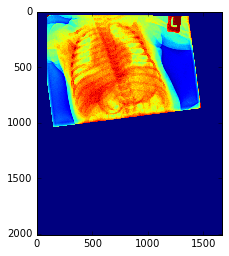

In [250]:
plt.imshow(im)

# Calculate features

In [ ]:
from wndcharm.FeatureSpace import FeatureSpace
import pdb; pdb.set_trace()
fs = FeatureSpace.NewFromFileOfFiles('KENYA_CXR_CASE.fof', long=True, quiet=False)
fs.ToFitFile( 'KENYA_CXR_CASE.fit' )